# 问题简述

一年认定为365天(暂时忽略闰年),计算在n个人的小组中至少有两个人的生日相同的概率

# 思路:
$\because$
$$P(至少存在两个人生日相同) = P(两个人生日相同) + P(三个人生日相同) + P(四个人生日相同) + \dots +P(所有人生日相同) = \sum_{i=1}^{n}P(i个人生日相同)$$

$\therefore$
$$太麻烦了,换方法$$


$$P(至少存在两个人生日相同) = 1 - P(任意两个人生日都不相同)$$


$$P(任意两个人生日都不相同) = \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \dots \times \frac{365-n+1}{365} = \frac{1}{365}\Pi_{i=1}^{n-1}\frac{365-n+1}{365}$$
# 代码
## 计算概率

In [11]:
def birthdayCheck(people):
    p = 1;
    for i in range(people):
        p = p*(365-i+1)/365
    print(1-p)
birthdayCheck(30);

0.6800944786763462


## 模拟
把1月1日到12月31日赋值为1到365

### 步骤一:给人分配生日

In [8]:
import random
def simulation(people):
    birthdays = list()
    peoples = list()
    for i in range(people):
        birthdays.append(random.randint(1,365))
        peoples.append(i)
    return birthdays,peoples

### 步骤二:查看生日是否相同

In [9]:
def tran(z):
    a = [1,31,59,90,120,151,181,212,243,273,304,334]
    str = ''
    for j in z:
        for i in range(len(a)):
            if j < a[i]:
                str += "{}月{}号".format(i,j-a[i-1]+1)
                str += "  |  "
                break
    return str if str != '' else "无"

In [10]:
birthdays,peoples = simulation(30)
import matplotlib.pyplot as plt
def alter(x,y):
    return x, y+3
def getSame(birthdays):
    cnt = 0
    x = list()
    y = list()
    z = list()
    for i in range(len(birthdays)):
        for j in range(i+1,len(birthdays)):
            if birthdays[i] == birthdays[j]:
                cnt += 1
                x.append(i)
                y.append(j)
                z.append(birthdays[i])
    return cnt,x,y,z

cnt,x,y,z = getSame(birthdays)
print(tran(birthdays))
print("有{}组生日相同".format(cnt))
print("重复日期为" + tran(z))
for i in range(len(x)):
    print("第{}人和第{}人生日相同".format(x[i],y[i]))

[40, 161, 316, 199, 28, 26, 50, 129, 118, 269, 128, 88, 69, 333, 351, 323, 337, 97, 1, 88, 280, 187, 18, 141, 300, 257, 241, 50, 113, 213]
有2组生日相同
重复日期为2月20号  |  3月30号  |  
第6人和第27人生日相同
第11人和第19人生日相同


In [5]:
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='SimHei .ttf')
plt.rcParams['font.sans-serif'] = ['SimHei']

D:\anaconda3\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "D:\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "D:\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "D:\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
   

AttributeError: module 'matplotlib' has no attribute 'font_manager'

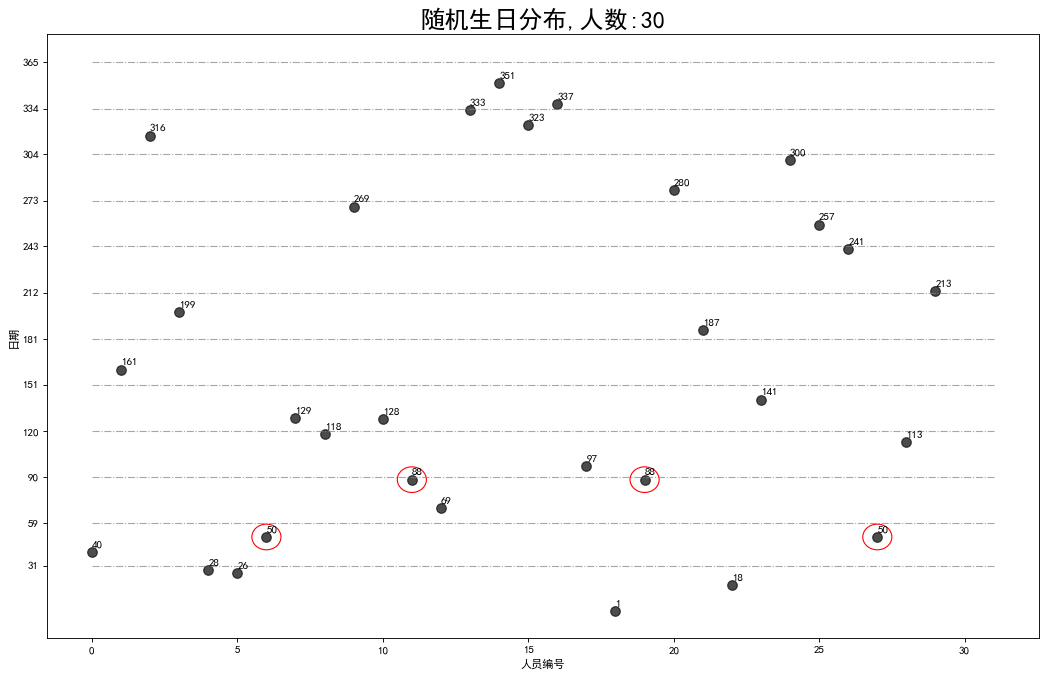

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=[31,59,90,120,151,181,212,243,273,304,334,365], xmin=0, xmax=len(peoples)+1, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=birthdays, x=peoples, s=75, color='black', alpha=0.7)
plt.rc('font',family='SimHei')
# Title, Label, Ticks and Ylim
ax.set_title('随机生日分布,人数:{}'.format(len(peoples)), fontdict={'size':22})
ax.set_xlabel('人员编号')
ax.set_ylabel('日期')
ax.set_yticklabels = ['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']
ax.set_yticks([31,59,90,120,151,181,212,243,273,304,334,365])
for i in range(len(birthdays)):
    textx,texty = alter(peoples[i],birthdays[i])
    ax.text(textx,texty,birthdays[i])
if cnt != 0:
    for i in range(len(x)):
        plt.gcf().gca().add_artist(Ellipse(xy = (x[i],z[i]), width = 1, height = 17, fill = False, color = "red"))
        plt.gcf().gca().add_artist(Ellipse(xy = (y[i],z[i]), width = 1, height = 17, fill = False, color = "red"))
ax.set_xlim()
plt.show()

由于字体问题,如果使用google colab运行,使用下面代码,否则中文汉字因为没有字体导致乱码

In [ ]:
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='SimHei .ttf')
from matplotlib.patches import Ellipse
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=[31,59,90,120,151,181,212,243,273,304,334,365], xmin=0, xmax=len(peoples)+1, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=birthdays, x=peoples, s=75, color='black', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('随机生日分布,人数:{}'.format(len(peoples)), fontdict={'size':22},fontproperties=zhfont)
ax.set_xlabel('人员编号',fontproperties=zhfont)
ax.set_ylabel('日期',fontproperties=zhfont)
ax.set_yticklabels(['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月'], fontproperties = zhfont)
ax.set_yticks([31,59,90,120,151,181,212,243,273,304,334,365])
for i in range(len(birthdays)):
    textx,texty = alter(peoples[i],birthdays[i])
    ax.text(textx,texty,birthdays[i])
if cnt != 0:
    for i in range(len(x)):
        plt.gcf().gca().add_artist(Ellipse(xy = (x[i],z[i]), width = 1, height = 17, fill = False, color = "red"))
        plt.gcf().gca().add_artist(Ellipse(xy = (y[i],z[i]), width = 1, height = 17, fill = False, color = "red"))
ax.set_xlim()
plt.show()